# Introducción a Python para ciencias e ingenierías (clase 6)


Ing. Martín Gaitán

- Twitter: `@tin_nqn_`
- Email: gaitan@gmail.com

**Anotate en las listas de correo**

- python.org.ar  (Python General -- Tod@s!)
- scipyla.org   (Python Científico - en portuñol/ingles)
--------



## Acelerando Python


Algunas cosas que hay que saber:

- Python es un lenguaje de programación estandarizado que tiene **múltiples implementaciones**
- La implementación típica y oficial se llama estrictamente **CPython**, porque está programada en **C**
- Existen **otras implementaciones** del estándar: IronPython (.Net), Jython (Java) y hasta una implementación en una versión reducida Python llama **PyPy** (que, de paso, es rapidísima)
- Cada versión tiene sus propias ventajas, pero el hecho de que CPython sea C **permite extender con código muy eficiente hecho en C** (o C++)
- Pero **programar** en lenguajes de bajo nivel como **C es un *perno* **. 




![](img/chart.png)

## Cython

Ya vimos la herramienta F2py que aprovecha que Fortran y CPython se basan en C, y analizando el código fortran genera el "pegamento" (cabecesas y código C) para comunicar Python con Fortran. El resultado es un módulo (una extensión) importable desde python, donde las subrutinas fortran se convierten en funciones Python. 

Cython es conceptualmente similar: **es un lenguaje** (con su correspondiente compilador), que extiende la sintaxis de Python (python con sabor a C). El **compilador Cython produce código C estándar** listo para ser compilado y usado como una extensión.

* código python válido es código cython válido
* Se pueden **llamar funciones en C**, o funciones/métodos de C++, **directamente** desde el código en Cython.   
* Es posible usar declarar tipos explícitamente (enteros, flotantes, o cualquier tipo de dato).

### Instalación


    conda install -u cython

o 

    pip install cython


### Hola mundo (versión larga)

Por convención, los archivos Cython se guardan con extensión .pyx  (viene de Pyrex, que es el paquete precedente)


In [25]:
%%file helloworld.pyx

print('Hola Curso, soy Cython')

Overwriting helloworld.pyx


Podemos compilar este código Cython para que genere el código C necesario para crear nuestra extensión Python

In [2]:
!cython -a helloworld.pyx

In [15]:
!cat helloworld.c

/* Generated by Cython 0.22 */

#define PY_SSIZE_T_CLEAN
#ifndef CYTHON_USE_PYLONG_INTERNALS
#ifdef PYLONG_BITS_IN_DIGIT
#define CYTHON_USE_PYLONG_INTERNALS 0
#else
#include "pyconfig.h"
#ifdef PYLONG_BITS_IN_DIGIT
#define CYTHON_USE_PYLONG_INTERNALS 1
#else
#define CYTHON_USE_PYLONG_INTERNALS 0
#endif
#endif
#endif
#include "Python.h"
#ifndef Py_PYTHON_H
    #error Python headers needed to compile C extensions, please install development version of Python.
#elif PY_VERSION_HEX < 0x02060000 || (0x03000000 <= PY_VERSION_HEX && PY_VERSION_HEX < 0x03020000)
    #error Cython requires Python 2.6+ or Python 3.2+.
#else
#define CYTHON_ABI "0_22"
#include <stddef.h>
#ifndef offsetof
#define offsetof(type, member) ( (size_t) & ((type*)0) -> member )
#endif
#if !defined(WIN32) && !defined(MS_WINDOWS)
  #ifndef __stdcall
    #define __stdcall
  #endif
  #ifndef __cdecl
    #define __cdecl
  #endif
  #ifndef __fastcall
    #define __fastcall
  #endif
#endif
#ifndef DL_IMPORT
  #define DL_IMPORT(t

In [3]:
from IPython.core.display import HTML
HTML(filename='helloworld.html')

Con el código C necesario, podemos compilar nuestra extensión

In [4]:
!gcc -shared -pthread -fPIC -fwrapv -O2 -Wall -fno-strict-aliasing -I /usr/include/python3.4 -o helloworld.so helloworld.c

In [6]:
import helloworld

Hola Curso, soy Cython


Buenísimo, pero un poquito trabajoso, no?

### Hola Mundo, usando distutils

`distutils` es un módulo de la biblioteca estándar (es decir, ya viene con python) que sirve para definir archivos de instalación de paquetes Python, sean python puro o con extensiones en C/C++. 

Cython agrega una función ``cythonize`` que llama al compilador cython y le dice a `distutils` cual es el código C que debe compilar


In [7]:
%%file helloworld2.pyx

print('Hola Curso, sigo siendo Cython')

Writing helloworld2.pyx


In [8]:
%%file setup.py

from distutils.core import setup
from Cython.Build import cythonize

setup(
    ext_modules = cythonize("helloworld2.pyx")
)


Overwriting setup.py


El archivo `setup.py`, por el sólo hecho de usar `distutils.setup`, se convierte en un script de instalación y tiene muchos subcomandos. En particular nos interesa `build_ext`

In [9]:
!python setup.py build_ext --inplace

Compiling helloworld2.pyx because it changed.
Cythonizing helloworld2.pyx
running build_ext
building 'helloworld2' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fstack-protector-strong -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.4m -I/home/tin/.virtualenvs/curso/include/python3.4m -c helloworld2.c -o build/temp.linux-x86_64-3.4/helloworld2.o
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.4/helloworld2.o -o /home/tin/lab/curso-python-cientifico/helloworld2.cpython-34m.so


In [11]:
import helloworld2

Obviamente, no debemos compilar el código cython cada vez que lo queremos usar, sino cada vez que lo modificamos. 

## Hola mundo, the magic way

Pero si lo usamos en el notebook y lo modificamos seguido, es mejor usa el comándo magic **cython** 

In [1]:
# %load_ext cythonmagic    en versiones anteriores a 0.21
%load_ext cython

In [2]:
%%cython

print('Hola, soy cython, a través de un magic')

Hola, soy cython, a través de un magic


De paso, permitanmé el autobombo

In [3]:
!cat ~/.virtualenvs/curso/lib/python3.4/site-packages/Cython/Build/IpythonMagic.py | grep -B 2 "Gaitán"


Code moved from IPython and adapted by:
* Martín Gaitán


### Paréntesis: funciones generadoras

In [6]:
def fib(n):
    """cálcula la serie hasta n y devuelve una lista"""
    serie = []
    a, b = 0, 1
    while b < n:
        serie.append(b)
        a, b = b, a + b
    return serie

fib(100)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [7]:
%timeit fib(1000000)

100000 loops, best of 3: 3.56 µs per loop


In [8]:
def fib_2(n):
    """cálcula la serie hasta n y devuelve una lista"""
    serie = []
    a, b = 0, 1
    while b < n:
        yield b            # devuelve el valor actual y marca el punto de entrada para la proxima llamada
        a, b = b, a + b

In [9]:
fib_2(100)

<generator object fib_2 at 0x7f756bda24c8>

In [10]:
list(fib_2(30))

[1, 1, 2, 3, 5, 8, 13, 21]

In [11]:
%timeit list(fib(100000))

The slowest run took 6.23 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.21 µs per loop


### ) 

(Fin del paréntesis)

### El mismo generador en Cython

In [12]:
%%cython

def fib_cython(n):
    """Print the Fibonacci series up to n."""
    a, b = 0, 1
    while b < n:
        yield b
        a, b = b, a + b

In [13]:
%timeit list(fib_cython(100000))

The slowest run took 13.02 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.56 µs per loop


### Cython on steroids

Pero veamos un código Cython que no sea Python puro. Supongamos que queremos calcular $\sum_{i=0}^n \alpha^i$ para $\alpha, n$ dados. 

Obviamente, antes de optimizar un algoritmo podriamos aplicar la formula de la progresión geométrica 

$$
\sum_{i=0}^n \alpha^i = \frac{1 - \alpha^{n+1}}{1 - \alpha}
$$

pero para "medir músculos" (?) lo haremos iterativamente

In [32]:
def geo_prog(alpha, n):
    current = 1.0
    sum = current
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

In [63]:
%timeit geo_prog(-4.0, 500)

10000 loops, best of 3: 35 µs per loop


In [39]:
%%cython 
def geo_prog_cython(double alpha, int n):
    cdef double current = 1.0
    cdef double sum = current          # declaracion estática de tipo!
    cdef int i
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

In [64]:
%timeit geo_prog_cython(-4.0, 500)

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 876 ns per loop


In [65]:
35e-6 / 876e-9

39.954337899543376

In [66]:
geo_prog_cython(-4.0, 500) == geo_prog(-4.0, 500)  

True

Lindo, no?

### Funciones Cython internas y públicas

la directiva `cdef` tambien permite definir funciones a nivel C/C++, pero son de uso interno a nivel Cython, y no se exponen a Python


In [71]:
%%cython 

cdef double priv_geo_prog_cython(double alpha, int n):
    cdef double current = 1.0
    cdef double sum = current          # declaracion estática de tipo!
    cdef int i
    for i in range(n):
        current = current * alpha
        sum = sum + current
    return sum

def public_geo_prog_cython(double alpha, int n):
    return priv_geo_prog_cython(alpha, n)

In [72]:
priv_geo_prog_cython(2., 10)

NameError: name 'priv_geo_prog_cython' is not defined

In [73]:
public_geo_prog_cython(2., 10)

2047.0

### Cython y numpy


La reglas de broadcasting y vectorización aplican al código Cython

In [77]:
%%cython

def f_plain(x):
    return x * (x - 1)

def integrate_f_plain(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f_plain(a + i * dx)
    return s * dx

In [80]:
integrate_f_plain(0, 100, 2000)

328085.875

In [126]:
integrate_f_plain(np.array([0, 1, 2]), np.array([10, 15, 20]), 20)

array([  261.25,   940.31,  2298.33])

Pero más aún, se puede usar numpy internamente

In [132]:
%%cython

import numpy as np
cimport cython
from libc.math cimport sqrt

def pairwise_cython(double[:,:] X):
    cdef int M = X.shape[0]
    cdef int N = X.shape[1]
    cdef double tmp, d
    cdef double[:, :] D = np.empty((M, M), dtype=np.float64)
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = sqrt(d)
    return np.asarray(D)

In [128]:
import numpy as np
X = np.random.random((100, 3))

In [131]:
pairwise_cython(X)

array([[ 0.        ,  0.54153725,  0.84112229, ...,  0.83357952,
         0.98540049,  0.2462404 ],
       [ 0.54153725,  0.        ,  0.48185778, ...,  0.37069301,
         0.6062851 ,  0.58618017],
       [ 0.84112229,  0.48185778,  0.        , ...,  0.19149354,
         0.98824587,  0.82521435],
       ..., 
       [ 0.83357952,  0.37069301,  0.19149354, ...,  0.        ,
         0.80664862,  0.82628071],
       [ 0.98540049,  0.6062851 ,  0.98824587, ...,  0.80664862,
         0.        ,  1.02582266],
       [ 0.2462404 ,  0.58618017,  0.82521435, ...,  0.82628071,
         1.02582266,  0.        ]])

# Numba

Numba es otra manera de optimizar código Python a través de un proceso de compilación. A diferencia de Cython, el proceso de compilación no produce código C válido para ser compilado como una extensión, sino que directamente se compila a "código maquina", pero *justo cuando se lo necesita* (ver [Just in Time compilation](http://en.wikipedia.org/wiki/Just-in-time_compilation))

Numba utiliza como tecnología subyacente la infraestructura de compilación [LLVM](http://en.wikipedia.org/wiki/LLVM) que es la encargada de realizar estas optimizaciones al vuelo 

### Instalación

Usando conda

    conda install numba
    
Via pip/virtualenv (linux)

    sudo apt-get install libllvm build-essential libllvm-dev libedit-dev
    pip install llvmlite
    pip install numba


In [145]:
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

In [146]:
x = np.ones((10, 10))

In [147]:
sum2d(x)

100.0

In [152]:
m_random = np.random.rand(1000, 1000)

In [154]:
%timeit sum2d(m_random)

1 loops, best of 3: 227 ms per loop


Así se aplica la magia de Numba

In [155]:
from numba import jit

sum2d_numba = jit(sum2d)

Para quienes desconfian, comprobemos que la funcion "numbizada" produce el mismo resultado

In [157]:
sum2d(m_random) == sum2d_numba(m_random)

True

Pero anda un par de cientos de veces más rápido

In [158]:
%timeit sum2d_numba(m_random)

The slowest run took 9.00 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.04 ms per loop


Una forma forma más elegante de usar usar `jit` es como un **decorador**

In [159]:
@jit
def sum2d_(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

In [160]:
%timeit sum2d_(m_random)

The slowest run took 96.07 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.04 ms per loop


¡Más de 200 veces más rápido con una línea de código!

In [239]:
from scipy.misc import lena
image =  lena()

In [240]:
%matplotlib inline

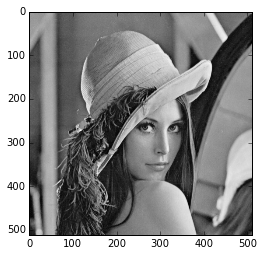

In [241]:
from matplotlib import pyplot as plt

plt.gray()
plt.imshow(lena_img)

In [243]:
import numpy as np

def filter2d_simple(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf // 2
    Nf2 = Nf // 2
    result = np.zeros(image.shape)
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            num = 0.0
            for ii in range(Mf):
                for jj in range(Nf):
                    num += (filt[Mf-1-ii, Nf-1-jj] * image[i-Mf2+ii, j-Nf2+jj])
            result[i, j] = num
    return result

In [248]:
filter = np.ones((5,5), dtype=np.int32)

1 loops, best of 3: 28.1 s per loop


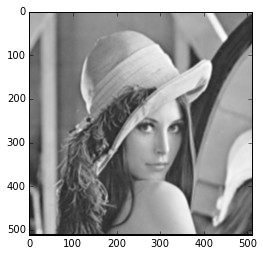

In [249]:
%%timeit
plt.imshow(filter2d_simple(image, filter))

In [260]:
@jit(int32[:,:](int32[:,:], int32[:,:]))
def filter2d_numba(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf // 2
    Nf2 = Nf // 2
    result = np.zeros_like(image)
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            num = 0.0
            for ii in range(Mf):
                for jj in range(Nf):
                    num += (filt[Mf-1-ii, Nf-1-jj] * image[i-Mf2+ii, j-Nf2+jj])
            result[i, j] = num
    return result

La sintaxis de parámetros para `jit()`  es `salida(*entrada)`. En este caso todas matrices de enteros de 32bits

The slowest run took 9.43 times longer than the fastest. This could mean that an intermediate result is being cached 
10 loops, best of 3: 20.2 ms per loop


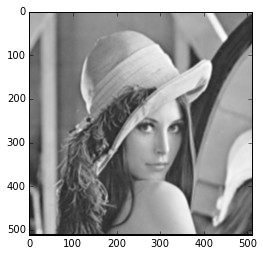

In [261]:
%%timeit
plt.imshow(filter2d_numba(image, filter))

In [262]:
filter2d_numba(image, filter) == filter2d_simple(image, filter)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [253]:
np.all(_)

True

1400 veces más rápido casi sin modificar el código!

De paso, Scipy tiene esta función definida

In [266]:
from scipy.ndimage import convolve

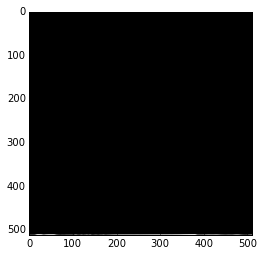

In [264]:
plt.imshow(convolve(image, filter, mode='constant') - filter2d_numba(image, filter))

The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 14.2 ms per loop


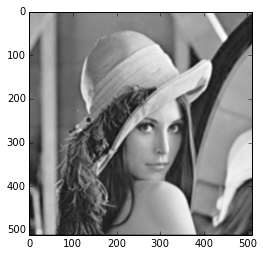

In [267]:
%%timeit 
plt.imshow(convolve(image, filter, mode='constant'))

A todo esto, les gustó [Lena](http://en.wikipedia.org/wiki/Lenna), cierto?

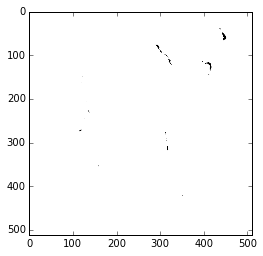

In [364]:
plt.imshow(lena_img < lena_img.max()-20)

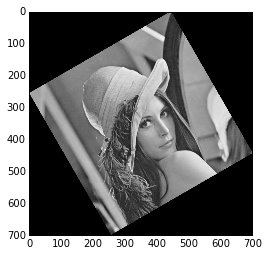

In [365]:
from scipy.ndimage.interpolation import rotate
plt.imshow(rotate(lena_img, 30))

Si les interesa esta área deberian ver los paquetes especializados [Scikit-image](http://scikit-image.org/), [Pillow](http://pillow.readthedocs.org) y [OpenCV](http://opencv.org/)

### Los límites de la magia de Numba y como maximizarla

Cuando no se definen tipos en la signatura, Numba hace una compilación *"lazy"* (vaga, que no se produce hasta el momento de se invoncada la función), e intentará operar sobre cualquier tipo de datos que reciba

In [367]:
from numba import jit

@jit
def plus(x, y):
    # A somewhat trivial example
    return x + y



In [368]:
plus(3.4, 3)

6.4

In [369]:
plus('a', 'b')

'ab'

Cuando especificamos la signatura, la optimización es *"eager"*, y obviamente esta especialización aumenta la performance sacrificando versatilidad

In [ ]:
@jit(int32(int32, int32))
def plus32(x, y):
    # A somewhat trivial example
    return x + y


In [370]:
plus32(2, 345)

347

Si pasamos parámetros "convertibles" al tipo esperado, por defecto Numba le consultará a Python si hay una regla de  *casting* (conversión de tipos) que se pueda aplicar

In [373]:
plus32(2.5, 345)

347

Pero cuando el *cast* falla, se produce un error

In [371]:
plus32('a', 'b')

TypeError: No matching definition for argument type(s) str, str

Numba tiene **dos estrategias de compilación**: una optimización directa y de máxima perfomance denominado **modo nopython**, que genera código maquina que "no requiere consultar a la API C de Python" logrando inferir los tipos de datos con los que está trabajando. Cuando esta inferencia falla (cuando Numba no logró inferir cuál es el tipo de dato "dinámico" de alguna operación), automáticamente conmuta al **modo object** que sí utiliza la API C de Python. En este modo las únicas optimizaciones que se producen son con los *loops*. 



Pero la técnica de optimización es **factorizar el código "nopython"**. Para evitar que implicitamente se pase a modo object, se puede forzar el modo con `nopython=True`


In [387]:
suma(1, (1,))

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [389]:
@jit(nopython=True)
def suma_nopy(x, y):
    return x + y

In [391]:
suma_nopy(1, (1,))

2.0

### Un ejemplo: minimos locales en un grid 2D

Por ejemplo, imaginemos que tenemos que detectar valores mínimos locales dentro de una malla. Los valores mínimos deberán ser simplemente valores más bajos que los que haya en los 8 nodos de su entorno inmediato


In [411]:
data = np.random.randn(1000, 1000)

In [412]:
def busca_min_np(malla):
    minimos = np.zeros_like(malla, dtype=bool)
    for i in range(1, malla.shape[1]-1):
        for j in range(1, malla.shape[0]-1):
            if all((malla[j, i] < malla[j-1, i-1],
                    malla[j, i] < malla[j-1, i],
                    malla[j, i] < malla[j-1, i+1],
                    malla[j, i] < malla[j, i-1],
                    malla[j, i] < malla[j, i+1],
                    malla[j, i] < malla[j+1, i-1],
                    malla[j, i] < malla[j+1, i],
                    malla[j, i] < malla[j+1, i+1])):
                minimos[i, j] = True

    return np.nonzero(minimos)

In [413]:
busca_min_np(data)

(array([  1,   1,   1, ..., 998, 998, 998]),
 array([  6,   8,  23, ..., 985, 995, 998]))

In [405]:
%timeit busca_min_np(data)

1 loops, best of 3: 11.6 s per loop


In [406]:
busca_min_np_numba_object = jit(busca_min_np)

In [408]:
np.all(busca_min_np_numba_object(data)[0] == Out[404][0])

True

In [409]:
%timeit busca_min_np_numba_object(data)

1 loops, best of 3: 19.1 s per loop


In [414]:
@jit(nopython=True)
def busca_min_np_numba_nopy(malla):
    minimos = np.zeros_likes(malla, dtype=bool)
    for i in range(1, malla.shape[1]-1):
        for j in range(1, malla.shape[0]-1):
            if all((malla[j, i] < malla[j-1, i-1],
                    malla[j, i] < malla[j-1, i],
                    malla[j, i] < malla[j-1, i+1],
                    malla[j, i] < malla[j, i-1],
                    malla[j, i] < malla[j, i+1],
                    malla[j, i] < malla[j+1, i-1],
                    malla[j, i] < malla[j+1, i],
                    malla[j, i] < malla[j+1, i+1])):
                minimos[i, j] = True

    return np.nonzero(minimos)

busca_min_np_numba_nopy(data)

AttributeError: Failed at nopython (analyzing bytecode)
'module' object has no attribute 'zeros_likes'

Nos dice que no conoce la función `zeros_like` de Numpy, porque efectivamente,  no está entre las [funcionalidades de Numpy soportadas](http://numba.pydata.org/numba-doc/0.18.2/reference/numpysupported.html) por Numba

In [415]:
def busca_min_np_jit(malla):
    minimos = np.zeros_like(malla, dtype=bool)
    _busca_min(malla, minimos)
    return np.nonzero(minimos)

@jit(nopython=True)
def _busca_min(malla, minimos):
    for i in range(1, malla.shape[1]-1):
        for j in range(1, malla.shape[0]-1):
            if (malla[j, i] < malla[j-1, i-1] and
                malla[j, i] < malla[j-1, i] and
                malla[j, i] < malla[j-1, i+1] and
                malla[j, i] < malla[j, i-1] and
                malla[j, i] < malla[j, i+1] and
                malla[j, i] < malla[j+1, i-1] and
                malla[j, i] < malla[j+1, i] and
                malla[j, i] < malla[j+1, i+1]):
                minimos[i, j] = True
                
busca_min_np_jit(data)

(array([  1,   1,   1, ..., 998, 998, 998]),
 array([  6,   8,  23, ..., 985, 995, 998]))

In [416]:
%timeit busca_min_np_jit(data)

10 loops, best of 3: 19.9 ms per loop
